# Credit Card Fraud Detection
The following dataset is being downloaded from Kaggle. This data set contains credit card data that has some fradulant events. As part of this notebook we will do classification that contains two classes Fraud, No Fraud. We will try various algorithms to findout the best algorithm that we can apply for this kind of datasets.
This data set contains the variable V1-V28 which are the principal components of the original dataset. Due to security concerns the original dataset was not released to public. As part of initial data analysis we are gonna use all the variables in our model building.
Here we have a Time variable which shows the transaction time each event that happened relative to the first transaction in the dataset.
Lets do the exploratory analysis on the data.

In [1]:
# Load the datasets
import pandas as pd
import os
import matplotlib
from sklearn.utils import resample
import numpy as np
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_auc_score,roc_curve,classification_report,recall_score

In [2]:
# Read the creditcard csv file located at CreditCardData Folder
creditData = pd.read_csv("CreditCardData/creditcard.csv")

In [3]:
# List out all the columns of the dataset
creditData.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Exploratory Data Analysis(EDA)
Use pandasprofiling to do Exploratory analysis using single line of coding. For more refer
https://medium.com/@rameshbattu1989/one-line-code-for-quick-exploratory-data-analysis-eda-63fec70bd65c
https://www.datadiscuss.com/data-analysis-with-one-line-of-code/

In [ ]:
!pip install pandas_profiling
from pandas_profiling import ProfileReport

#### The below code will take little time to run. Grab a cup of coffee and wait for the results.

In [12]:
# You can save the profiling report as html page.
profile = ProfileReport(creditData, title="Pandas Credit Card Data Profiling Report")
profile #Saved as variable 
profile.to_file(output_file="CrediCardEDA.html")

In [ ]:
# Inline view of the pandas profiling report.
%matplotlib inline
creditData.profile_report()

### Continuing Exploratory Analysis

##### List out the data types of the Credit Data.
##### We have 30 variables of type float and One variable of type integer.
##### The variables Time, V1-V28 and Amount are Independent Variables.
##### The out put variable is Class which is having two classes 1(Fraud) and 0(No-Fraud)

In [4]:
creditData.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
# Size of the data set. Total 284807 observations ith 31 variables.
creditData.shape

(284807, 31)

In [6]:
# Describe the dataset
creditData.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
print("Total records in the base credit card data set",len(creditData))

Total records in the base credit card data set 284807


In [8]:
print("Frequecny of the Fraud(1) and No-Fraud(0) Data Elements")
creditData['Class'].value_counts()

Frequecny of the Fraud(1) and No-Fraud(0) Data Elements


0    284315
1       492
Name: Class, dtype: int64

#### From the above there are 492 Fraud events among 284807 events. So we have only 0.17 percentage only.
#### It clearly says there is lot of imbalance in the dataset. We have majority of the No-Fraud events.

In [9]:
# Look for the duplicate observations in the data set.
creditData_duplicate = creditData[creditData.duplicated()]

In [10]:
print("Total duplicate rows",len(creditData_duplicate))

Total duplicate rows 1081


In [11]:
# Drop the duplicate elements in the Credit Card Data
creditData_noDuplicates = creditData.drop_duplicates()

In [12]:
print("No of rows after deleting the duplicates",len(creditData_noDuplicates))

No of rows after deleting the duplicates 283726


In [13]:
# Standardize the Amount column as it is on different scale and it effects the Model building.
from sklearn.preprocessing import StandardScaler 

In [14]:
# normalise the amount column 
creditData_noDuplicates['normAmount'] = StandardScaler().fit_transform(np.array(creditData_noDuplicates['Amount']).reshape(-1, 1)) 

/home/rajeshpriyanka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# Drop Time and Amount columns as they are not relevant for prediction purpose  
creditData_noDuplicates = creditData_noDuplicates.drop(['Time', 'Amount'], axis = 1) 

In [16]:
# Output Column that contains the Class column which is the Dependent Variable.
y = creditData_noDuplicates['Class']

In [17]:
# Create a dataframe that has only the independent variables.
X = creditData_noDuplicates.drop('Class', axis=1)

In [69]:
# Split the training set into 70 and 30 ratio
from sklearn.model_selection import train_test_split 
  
# split into 70:30 ration 
creditData_noDuplicates_x_train, creditData_noDuplicates_x_test, creditData_noDuplicates_y_train, creditData_noDuplicates_y_test = train_test_split(X, y, test_size = 0.3, random_state = 54)

In [70]:
creditData_noDuplicates_x_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normAmount'],
      dtype='object')

## Sampling Techniques for Imbalanced Data Sets
From the above we see there is a lot of imbalance in the output class. We need to address the above problem.
This is called imbalance data set handling. We have three methods to handle the above scenario.
1. Oversampling - Increase the low class variable by duplicating the data.
2. Undersampling - Decrease majority class samples.
3. SMOTE - Create new input of the minority classes using nearest neightbouring method.

### 1. Oversampling

In [73]:
# Create a creditData_train using the Independent Variables.
creditData_train = creditData_noDuplicates_x_train.copy()

In [74]:
# Add the Dependent variable to create the Upsampling data.
creditData_train['Class'] =  creditData_noDuplicates_y_train

In [75]:
creditData_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normAmount', 'Class'],
      dtype='object')

In [76]:
# Write the Fraud and No-Fraud events into two different datasets.
credit_card_fraud = creditData_train[creditData_train['Class']==1]
credit_card_no_fraud = creditData_train[creditData_train['Class']==0]

In [77]:
print("Number of fraud rows : ",len(credit_card_fraud))
print("Number of Non-Fraud rows : ",len(credit_card_no_fraud))

Number of fraud rows :  329
Number of Non-Fraud rows :  198279


In [78]:
#Create the upsample Credit data using the Minority Class(Fraud).
credit_card_fraud_upsampled = resample(credit_card_fraud, 
                                       replace = True,
                                      n_samples = len(credit_card_no_fraud),
                                      random_state = 54)

In [79]:
print("After Upsampling the fraud events were equal to No-Fraud events : ",len(credit_card_fraud_upsampled))

After Upsampling the fraud events were equal to No-Fraud events :  198279


### Merge the no-fraud and upsample fraud events.

In [80]:
# Merge the oversample minority class(Fraud) events with original No-Fraud events.
creditData_upsampled = pd.concat([credit_card_no_fraud, credit_card_fraud_upsampled])

In [81]:
print("After upsampling the number of total events : ", len(creditData_upsampled))

After upsampling the number of total events :  396558


In [82]:
print("After Merge check for the Fraud and No-Fraud events.")
creditData_upsampled['Class'].value_counts()

After Merge check for the Fraud and No-Fraud events.


1    198279
0    198279
Name: Class, dtype: int64

### 2. Down sampling - Down Sampling the non-fraud events

In [83]:
# Create the Downsampling data using the Majority class
creditData_noFraud_downsample=resample(credit_card_no_fraud,
                                      replace=False,
                                      n_samples=len(credit_card_fraud),
                                      random_state=54)

In [84]:
print("After down sampling the non fraud events : ", len(creditData_noFraud_downsample))

After down sampling the non fraud events :  329


### Merge Fraud and Downsampled No-Fraud events

In [85]:
creditData_downsampled = pd.concat([credit_card_fraud, creditData_noFraud_downsample])

In [86]:
print("After down sampling the number of total events : ", len(creditData_downsampled))

After down sampling the number of total events :  658


In [87]:
print("After Down Sample Merge check for the Fraud and No-Fraud events.")
creditData_downsampled['Class'].value_counts()

After Down Sample Merge check for the Fraud and No-Fraud events.


1    329
0    329
Name: Class, dtype: int64

### 3. SMOTE

In [88]:
! pip install imblearn
from imblearn.over_sampling import SMOTE

In [89]:
sm = SMOTE(random_state = 54, 
           k_neighbors = 5,
          sampling_strategy = 'auto')

In [91]:
# Fit the above defined smote to the Independent and Dependent Data Frames which was created above.
creditData_noDuplicate_x_train_smote, creditData_noDuplicate_y_train_smote = sm.fit_sample(creditData_noDuplicates_x_train,
                                                                                   creditData_noDuplicates_y_train.ravel())

In [37]:
print("The size of the smote X-Train ", creditData_noDuplicate_x_train_smote.shape)
print("The size of the smore y_train", creditData_noDuplicate_y_train_smote.shape)

The size of the smote X-Train  (396558, 30)
The size of the smore y_train (396558,)


In [40]:
creditData_noDuplicates_x_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normAmount', 'Class'],
      dtype='object')

## Train the Models on the base data without handling Imbalanced Datasets

#### Logistic Regression, RandomForest and Support Vector Classification
#### Here we defined a function that takes the train and test dataset to build the model.
#### Here we are not looking into performance tuning and we will deal with that in another chapter.

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
def runModels(x_train,y_train,x_test,y_test):
    
    # Logistic regression which is recommended for classification
    lr = LogisticRegression()
    lr.fit(x_train,y_train)

    creditData_noDuplicates_x_train.columns

    logistic_creditData_predict = lr.predict(x_test)

    accuracy_score(y_test, logistic_creditData_predict)

    f1_score(y_test, logistic_creditData_predict)

    recall_score(y_test, logistic_creditData_predict)

    print("Logistic Regression Classification Report : \n",classification_report(y_test, logistic_creditData_predict))

    # RandomForest which is Tree based Algorithm.
    random_forest = RandomForestClassifier()
    random_forest.fit(x_train,y_train)
    
    # Support Vector Classification Algorithm.
    svc = SVC()
    svc.fit(x_train,y_train)

    random_forest_predict = random_forest.predict(x_test)
    svc_predict = svc.predict(x_test)

    print("Random Forest Classification Report : \n",
          classification_report(y_test, random_forest_predict))

    print("SVC Classification Report : \n",
          classification_report(y_test, svc_predict))

Below four chunks will take the above defined function for BaseData(With Imbalanced Dataset), 
Upsampled Data, Downsampled and Smote based data.
Grab a cup of coffee may be couple of cups as it will take little time to run the models and fetch the results.

In [65]:
### Run the models on the base data
runModels(creditData_noDuplicates_x_train, creditData_noDuplicates_y_train,
          creditData_noDuplicates_x_test, creditData_noDuplicates_y_test)

Logistic Regression Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84974
           1       0.88      0.58      0.70       144

    accuracy                           1.00     85118
   macro avg       0.94      0.79      0.85     85118
weighted avg       1.00      1.00      1.00     85118

Random Forest Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84974
           1       0.91      0.76      0.83       144

    accuracy                           1.00     85118
   macro avg       0.95      0.88      0.91     85118
weighted avg       1.00      1.00      1.00     85118

SVC Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84974
           1       0.94      0.62      0.74       144

    accuracy                           1.00     85118
   macro avg

In [81]:
### Run Models on the upsampled data
upsample_y_train = creditData_upsampled.Class
upsample_x_train = creditData_upsampled.drop('Class', axis=1)

upsample_x_train.shape

upsample_y_train.shape

runModels(upsample_x_train, upsample_y_train,
          creditData_noDuplicates_x_test, creditData_noDuplicates_y_test)

/home/rajeshpriyanka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     84974
           1       0.06      0.88      0.11       144

    accuracy                           0.98     85118
   macro avg       0.53      0.93      0.55     85118
weighted avg       1.00      0.98      0.99     85118

Random Forest Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84974
           1       0.89      0.76      0.82       144

    accuracy                           1.00     85118
   macro avg       0.95      0.88      0.91     85118
weighted avg       1.00      1.00      1.00     85118

SVC Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     84974
           1       0.10      0.87      0.19       144

    accuracy                           0.99     85118
   macro avg

In [82]:
#### Run Model on the downsampled data
downsample_y_train = creditData_downsampled.Class
downsample_x_train = creditData_downsampled.drop('Class', axis=1)

downsample_x_train.shape

downsample_y_train.shape

runModels(downsample_x_train, downsample_y_train,
          creditData_noDuplicates_x_test, creditData_noDuplicates_y_test)

Logistic Regression Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     84974
           1       0.04      0.90      0.07       144

    accuracy                           0.96     85118
   macro avg       0.52      0.93      0.52     85118
weighted avg       1.00      0.96      0.98     85118

Random Forest Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     84974
           1       0.05      0.89      0.09       144

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118

SVC Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     84974
           1       0.07      0.88      0.12       144

    accuracy                           0.98     85118
   macro avg

In [182]:
# RandomForest which is Tree based Algorithm.
random_forest = RandomForestClassifier()
random_forest.fit(creditData_noDuplicate_x_train_smote,creditData_noDuplicate_y_train_smote)

random_forest_predict = random_forest.predict(creditData_noDuplicates_x_test)

In [187]:
indices

array([13,  9, 11, 10,  3, 16,  2, 15,  1,  6, 20,  0,  8,  7,  4, 26, 18,
       28,  5, 17, 12, 25, 27, 14, 19, 24, 21, 23, 22])

Feature ranking:
1. feature 13 (0.177873) cumilative importance 0.177873
2. feature 9 (0.145465) cumilative importance 0.323338
3. feature 11 (0.110545) cumilative importance 0.433883
4. feature 10 (0.098882) cumilative importance 0.532765
5. feature 3 (0.090378) cumilative importance 0.623143
6. feature 16 (0.066037) cumilative importance 0.689180
7. feature 2 (0.048140) cumilative importance 0.737320
8. feature 15 (0.038779) cumilative importance 0.776098
9. feature 1 (0.027783) cumilative importance 0.803882
10. feature 6 (0.024042) cumilative importance 0.827924
11. feature 20 (0.015436) cumilative importance 0.843360
12. feature 0 (0.014557) cumilative importance 0.857918
13. feature 8 (0.014211) cumilative importance 0.872128
14. feature 7 (0.013604) cumilative importance 0.885732
15. feature 4 (0.011831) cumilative importance 0.897563
16. feature 26 (0.010696) cumilative importance 0.908259
17. feature 18 (0.010533) cumilative importance 0.918793
18. feature 28 (0.010195) cumila

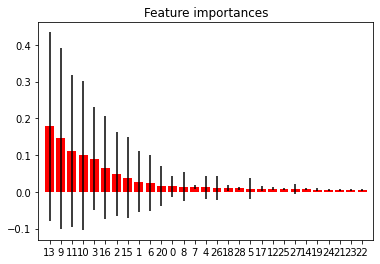

In [188]:
import matplotlib.pyplot as plt
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

sum = 0
for f in range(X.shape[1]):
    sum = sum + importances[indices[f]]
    print("%d. feature %d (%f) cumilative importance %f" % (f + 1, indices[f], importances[indices[f]], sum))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [83]:
#### Run Model on the smote data
creditData_noDuplicate_x_train_smote.shape

creditData_noDuplicate_y_train_smote.shape

runModels(creditData_noDuplicate_x_train_smote, creditData_noDuplicate_y_train_smote,
          creditData_noDuplicates_x_test, creditData_noDuplicates_y_test)

/home/rajeshpriyanka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     84974
           1       0.05      0.89      0.10       144

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.99     85118

Random Forest Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84974
           1       0.85      0.80      0.82       144

    accuracy                           1.00     85118
   macro avg       0.93      0.90      0.91     85118
weighted avg       1.00      1.00      1.00     85118

SVC Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     84974
           1       0.10      0.88      0.18       144

    accuracy                           0.99     85118
   macro avg

In [118]:
# Neural Network model for the classification with K fold validation

# multi-class classification with Keras
import pandas
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [114]:
x_neural = creditData_noDuplicate_x_train_smote.values

In [110]:
x_neural = np.asarray(x_neural)

In [115]:
x_neural

array([[-0.29839762,  0.73029468,  0.09805872, ...,  0.44071875,
         0.27390478, -0.17984372],
       [ 2.13813813, -0.70091711, -1.42902586, ..., -0.05579137,
        -0.0517516 , -0.19274313],
       [ 0.97126042, -0.77037646, -0.3872148 , ..., -0.02957813,
         0.01331461,  0.2477139 ],
       ...,
       [ 0.20501152,  2.16574035, -2.40024073, ..., -0.35207314,
        -0.27774777, -0.34933322],
       [-1.53574182,  0.8400378 , -1.55329971, ...,  0.10914303,
        -0.20067219, -0.29427853],
       [-3.81460368,  2.79609072, -3.45455497, ..., -1.34898009,
        -1.00410962, -0.07648328]])

In [97]:
creditData_noDuplicate_x_train_smote.shape

(396558, 29)

In [95]:
creditData_noDuplicate_y_train_smote

array([0, 0, 0, ..., 1, 1, 1])

In [96]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(creditData_noDuplicate_y_train_smote)
encoded_Y = encoder.transform(creditData_noDuplicate_y_train_smote)

In [123]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
 
# define baseline model
def baseline_model():
    # create model
    model = Sequential([
    Dense(units=16,input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1,activation='sigmoid')])
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
build_fn = baseline_model()

In [124]:
build_fn.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_52 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_54 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
___________________________________________________

In [125]:
build_fn.fit(creditData_noDuplicate_x_train_smote,creditData_noDuplicate_y_train_smote,batch_size=15,epochs=5)

Epoch 1/5
26438/26438 [==============================] - 48s 2ms/step - loss: 0.0334 - accuracy: 0.9886
Epoch 2/5
26438/26438 [==============================] - 50s 2ms/step - loss: 0.0116 - accuracy: 0.9969
Epoch 3/5
26438/26438 [==============================] - 50s 2ms/step - loss: 0.0087 - accuracy: 0.9978
Epoch 4/5
26438/26438 [==============================] - 49s 2ms/step - loss: 0.0075 - accuracy: 0.9982
Epoch 5/5
26438/26438 [==============================] - 52s 2ms/step - loss: 0.0068 - accuracy: 0.9984


In [162]:
build_fn_predict = build_fn.predict(creditData_noDuplicates_x_test)

In [174]:
y_test_copy = pd.DataFrame(creditData_noDuplicates_y_test)

In [175]:
y_pred = build_fn_predict.astype(int)

In [179]:
len(creditData_noDuplicate_y_train_smote[creditData_noDuplicate_y_train_smote == 0])

198279

In [176]:
pd.DataFrame(confusion_matrix(creditData_noDuplicates_y_test,y_pred))

,0,1
0,84974,0
1,144,0


In [173]:
score = build_fn.evaluate(creditData_noDuplicates_x_test,creditData_noDuplicates_y_test)

2660/2660 [==============================] - 3s 1ms/step - loss: 0.0200 - accuracy: 0.9983


In [171]:
type(creditData_noDuplicate_y_train_smote[0])

numpy.int64

In [163]:
print(classification_report(creditData_noDuplicates_y_test,build_fn_predict))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, x_neural, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
# Analysis of the Classification report of all the above models.

In [ ]:
# Conclusion